<div style="background-color: #1B3371; float: left; height: 100%; width: 100%;">
    <div style="background-color: #1B3371; float: left; padding: 2.5%; height: 100%; width: 65%;">
        <img src="https://www.usbr.gov/img/logo-white.png">
    </div>
    <div style="background-color: #1B3371; float: left; padding: 2.5%; height: 100%; width: 25%;">
        <div style="width: 95%; padding: 2.5%; color: white; font-weight: bold;">
            U.S. Department of the Interior<br>
            Bureau of Reclamation<br>
            Interior Region 10 · California-Great Basin<br>
            Division of Planning<br>
            Decision Analysis Branch<br>
            (916) 978-5060
        </div>
    </div>
</div>

## Tutorial
***
<div style="float: left; width: 10%; font-weight: bold;">
    Date:<br>
    Author:<br>
    Project:<br>
    Subject:<br>
</div>
<div style="float: left; width: 30%;">
    2020-01-05<br>
    Jim Shannon, PE<br>
    calsim_toolkit Development<br>
    Beginner Tutorial
</div>

***
### <u>Summary</u>
The tutorial covers the basic functionality of the `calsim_toolkit` Python module.
### <u>Notes</u>
1. The data used in this notebook is for discussion purposes only and is void for use outside of this notebook tutorial. No person or agency shall interpret the data presented in this notebook as an accurate representation of the current status of water resource infrastructure within the Central Valley Project (CVP), State Water Project (SWP), or other California water resource domains.
2. Data originates from a CalSim3 operations planning model. Logic in CalSim3 operation models does not necessarily represent the operating policies of the Central Valley Project (CVP), State Water Project (SWP), or other water agencies, nor does it necessarily represent the daily reservoir operations of the CVP, SWP, and other water agency infrastructure.
3. Results in this notebook are not to be used as a basis for operational policy decisions as they have not been reviewed for quality assurance.

### Standard Workflow Setup
After importing the `calsim_toolkit`, a user is able to read all or a subset of data from a CalSim DSS file.

In [1]:
# If `calsim_toolkit` is not in your Python's environment variables,
# then mport Python `sys` and append the system path.
import sys
sys.path.insert(1, '../..')
# Import the `calsim_toolkit`.
import calsim_toolkit as cs

The `calsim_toolkit` reads the data into a `pandas` DataFrame object and formats the data in a tidy format.

In [2]:
fp = '../../CalSim3/CONV/DSS/CS3dv.dss'
v = ['s_shsta', 'S_folsm']
df = cs.read_dss(fp, b=v, end_date='2015-09-30')
df.head()

Valid catalog found: True 
Number of records: 131170


,DateTime,Pathname,Units,Data Type,Value
0,1921-10-31,/CALSIM/S_FOLSM/STORAGE//1MON/L2015A/,TAF,PER-AVER,513.694511
1,1921-11-30,/CALSIM/S_FOLSM/STORAGE//1MON/L2015A/,TAF,PER-AVER,476.412694
2,1921-12-31,/CALSIM/S_FOLSM/STORAGE//1MON/L2015A/,TAF,PER-AVER,497.438003
3,1922-01-31,/CALSIM/S_FOLSM/STORAGE//1MON/L2015A/,TAF,PER-AVER,513.867918
4,1922-02-28,/CALSIM/S_FOLSM/STORAGE//1MON/L2015A/,TAF,PER-AVER,567.000000


The `calsim_toolkit` expands `pandas` DataFrame attributes for CalSim data through the `.cs` extension. The DataFrame can be reformatted into `.wide()` and `.condense()` formats to take advantage of `pandas` mathematical operations. 

In [3]:
df.cs.wide().head()

Part A          CALSIM             
Part B         S_FOLSM      S_SHSTA
Part C         STORAGE      STORAGE
Part E            1MON         1MON
Part F          L2015A       L2015A
Units              TAF          TAF
Data Type     PER-AVER     PER-AVER
DateTime                           
1921-10-31  513.694511  2914.511238
1921-11-30  476.412694  2820.839695
1921-12-31  497.438003  2992.889897
1922-01-31  513.867918  3124.132061
1922-02-28  567.000000  3516.242992

A user can also quickly visualize data plots with the `.cs.plot()` method. Available plots drawn with `matplotlib` are time series (TS) (default), annual average (AA), monthly average (MA), and scatter plot (SP).

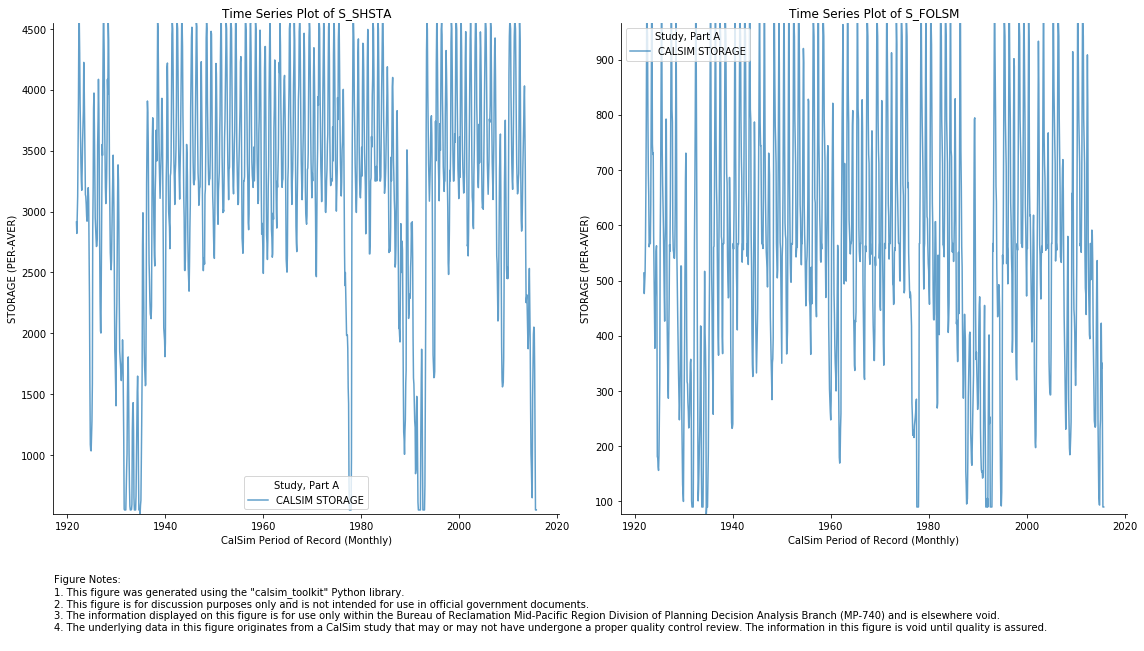

In [4]:
plot_ts = df.cs.plot()

The toolkit has an advantage over other standard CalSim procedures because it can load from multiple DSS files. The visualizations scale with the amount of studies provided.

In [5]:
df2 = cs.read_dss([fp] * 20, b=v, end_date='2015-09-30')


--------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this function
or another system process (possibly by the Excel add-in).

---DO NOT MODIFY THE CATALOG FILES (*.dsc, *.dsd)
---WHILE RUNNING THIS PYTHON SESSION!!!

Valid catalog found: True 
Number of records: 131170

--------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this function
or another system process (possibly by the Excel add-in).

---DO NOT MODIFY THE CATALOG FILES (*.dsc, *.dsd)
---WHILE RUNNING THIS PYTHON SESSION!!!

Valid catalog found: True 
Number of records: 131170

--------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this function
or another system process (possibly by the Excel add-in).

---DO NOT MODIFY THE CATALOG FILES (*.dsc, *.dsd)
---WHILE RUNNING THIS P

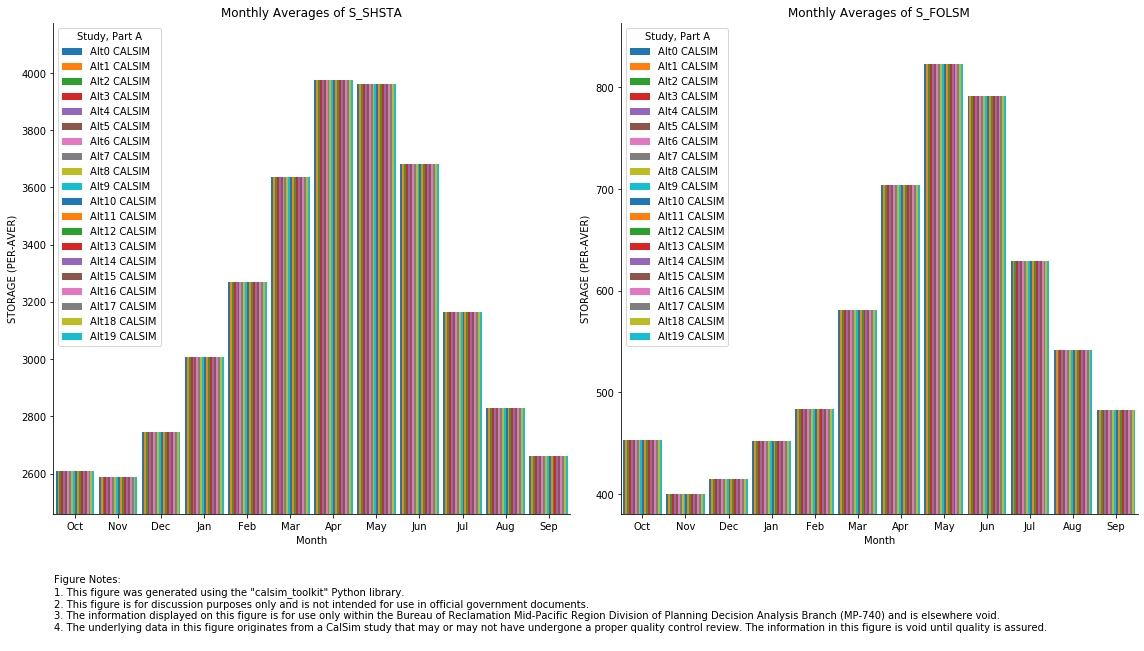

In [6]:
plot2_ma = df2.cs.plot('ma')

## Applications
The `calsim_toolkit` also comes with applications helpful for running CalSim studies and analzing input text files. To have Python run a CalSim study, import the `run_CalSim` module. It allows a user to allow a single or multiple studies in series or parallel. Please, note, the module utilizes [WRIMS2](https://water.ca.gov/Library/Modeling-and-Analysis/Modeling-Platforms/Water-Resource-Integrated-Modeling-System) to run the studies, and, switch the `run_bat` argument to `True` to actually run a CalSim study with Python.

In [7]:
from calsim_toolkit.apps import run_CalSim

In [8]:
lf = '../../CalSim3/CalSim3.launch'
run_CalSim.run_CalSim(lf, run_bat=False)

0

The `variable_dependencies` application assists users in navigating through the definition connectivity in the many CalSim WRESL files. After importing the application, simply search for a variable of interest and the application notes what feeds into and depends on this variable. The application uses Python's standard `re` library to leverage the power of [regular expression](https://en.wikipedia.org/wiki/Regular_expression).

In [9]:
from calsim_toolkit.apps import variable_dependencies as vd

In [10]:
results = vd.main('../../CalSim3', 's_shsta')

Variable Dependency Results for s_shsta in study diretory C:\Users\jshannon\Desktop\Working\CalSim3

s_shsta is defined in the following locations:
1. Line 13 of common\SJR_Cycle_Defs_Local.wresl
2. Line 92 of common\System\SystemTables_Sac\arcs-Reservoirs.wresl

There are no variable inputs for s_shsta.

The following variable rely on s_shsta as input:
1. setWSI_CVP_Storage: Lines 4 - 7 of common\cvp_dellogic\cvp_dellogic_s\deliveries_s\set_cvp_wsi_storage.wresl
2. ExportCap: Lines 80 - 87 of common\Delta\Ann\AnnCommon2.wresl
3. TracyMinPumpLevel: Lines 62 - 72 of common\Delta\Ann\ExportEstimate1.wresl
4. TracyMinPumpLevel: Lines 73 - 83 of common\Delta\Ann\ExportEstimate1_B2.wresl
5. TracyMinPumpLevel: Lines 16 - 26 of common\Delta\Ann\ExportEstimate1_PRESETUP.wresl
6. target_sac: Lines 39 - 58 of common\Delta\Ann\NegCarriageOpsLimit.wresl
7. tracyminpump: Lines 42 - 52 of common\Export_Ops\tracy_pump_allow.wresl
8. settracyminpump: Lines 56 - 73 of common\Export_Ops\tracy_pump_allow